In [287]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
from sklearn.metrics import pairwise_distances
from scipy.stats import rankdata

num_points = 200  # Number of points
radius = [1,2,3]       # Radii of the circles
gau_noise = 0.1  # Amount of random noise to add

In [224]:
# Generate angles evenly distributed along the circle
angles = np.linspace(0, 2 * np.pi, num_points)

In [225]:
x_all=[]
y_all=[]

In [226]:
# Generating points on the circle (x, y) for each radius.
for r in radius:
    x = r * np.cos(angles)
    y = r * np.sin(angles)
    x_noisy = x + np.random.normal(0, gau_noise, num_points) #adding random standard normal noise to x coordinates
    y_noisy = y + np.random.normal(0, gau_noise, num_points) #adding random standard normal noise to y coordinates
    x_all.append(x_noisy)
    y_all.append(y_noisy)

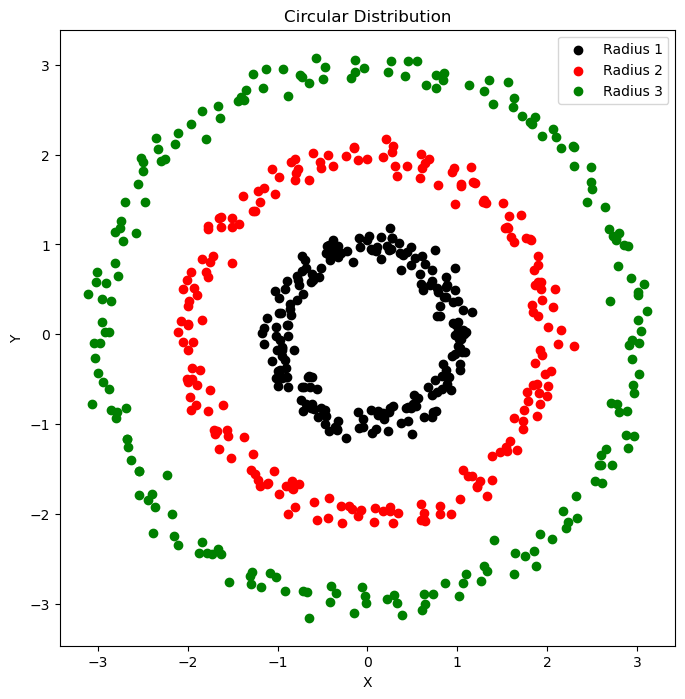

In [227]:
plt.figure(figsize=(8, 8))
plt.scatter(x_all[0], y_all[0], color='black', label='Radius 1')
plt.scatter(x_all[1], y_all[1], color='red', label='Radius 2')
plt.scatter(x_all[2], y_all[2], color='green', label='Radius 3')

plt.title('Circular Distribution')
plt.xlabel('X')
plt.ylabel('Y')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.show()

Data is already centered 

In [228]:
df =[]
i=0
tag=[]
while i<3:
    for (x_coord,y_coord) in zip(x_all[i], y_all[i]):
        if i+1==1:
            tag.append('k')
        elif i+1==2:
            tag.append('r')
        else:
            tag.append('g')
            
        df.append([x_coord, y_coord])
    i+=1



In [229]:
tag

['k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k'

In [230]:

kpca_obj = KernelPCA(kernel='poly', degree=2)

In [231]:
kpca_obj.fit(df)

KernelPCA(degree=2, kernel='poly')

In [232]:
transformed_df=kpca_obj.transform(df)

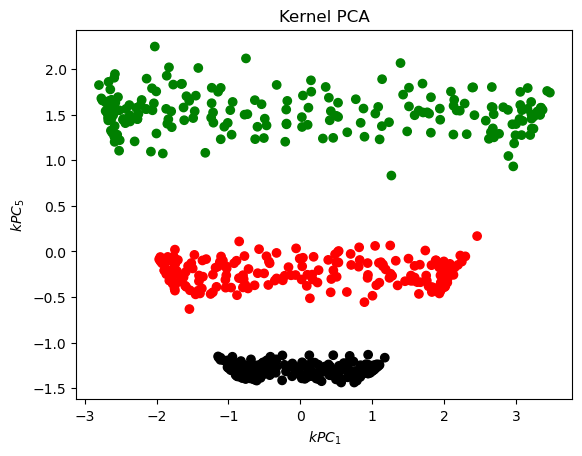

In [233]:
plt.figure(4)
plt.title("Kernel PCA")
plt.scatter(transformed_df[:, 0], transformed_df[:, 4], c=tag)
plt.xlabel("$kPC_1$")
plt.ylabel("$kPC_5$")
plt.show()

In [299]:
def pd_calculator(pairwise_list):
    pd=pairwise_distances(pairwise_list, metric='euclidean')
    flat_pd=pd.flatten()
    return flat_pd


In [300]:
flat_original_pd = pd_calculator(df)
flat_poly_pd = pd_calculator(transformed_df)

In [301]:
def shephard_diagram(original_distance_flat, transformed_distance_flat):
    orig_dist_rank = rankdata(original_distance_flat.ravel())
    trans_dist_rank = rankdata(transformed_distance_flat.ravel())
    plt.scatter(y=orig_dist_rank, x=trans_dist_rank, alpha=0.5, s=1)
    plt.plot([0, np.max(orig_dist_rank)], [0, np.max(trans_dist_rank)], 'r--')  # y = x line
    plt.title("Shepherd's Diagram for Kernel PCA")
    plt.xlabel('Distances in Transformed Space')
    plt.ylabel('Distances in Original Space')
    plt.show()

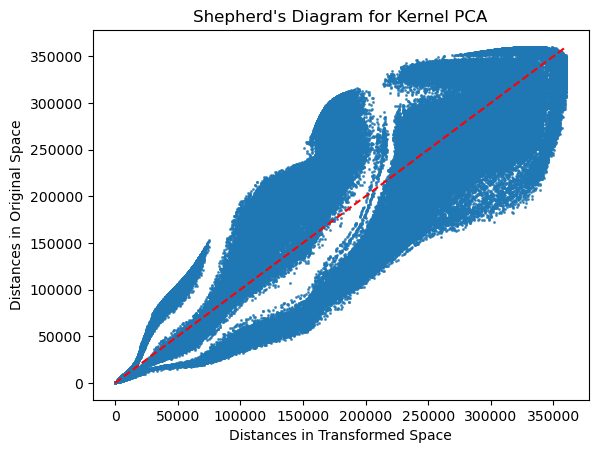

In [302]:
shephard_diagram(flat_original_pd, flat_poly_pd)

## Part D

In [303]:
sigma = [0.1, 1, 3, 10]
transformed_df_gau=[]
for sig in sigma:
    gamma = 1/(2*sig**2)
    gau_kpca_obj= KernelPCA(kernel='rbf', gamma=gamma, n_components=None)
    gau_kpca_obj.fit(df)
    transformed_df_gau.append(gau_kpca_obj.transform(df))

    
    

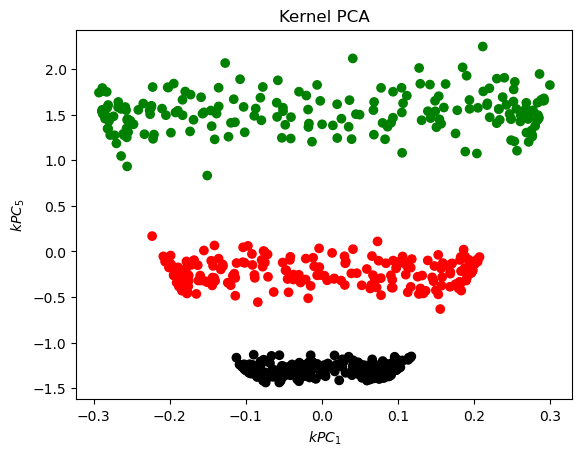

In [304]:
plt.figure(4)
plt.title("Kernel PCA")
plt.scatter(transformed_df_gau[3][:, 0], transformed_df[:, 4], c=tag)
plt.xlabel("$kPC_1$")
plt.ylabel("$kPC_5$")
plt.show()

In [340]:
pd_sigma_one=pairwise_distances(transformed_df_gau[0][:,[0,1,2,3,4]])
pd_sigma_two = pairwise_distances(transformed_df_gau[1][:,[0,1,2,3,4]])
pd_sigma_three= pairwise_distances(transformed_df_gau[2][:, [0,1,2,3,4]])
pd_sigma_four = pairwise_distances(transformed_df_gau[3][:,[0,1,2,3,4]])

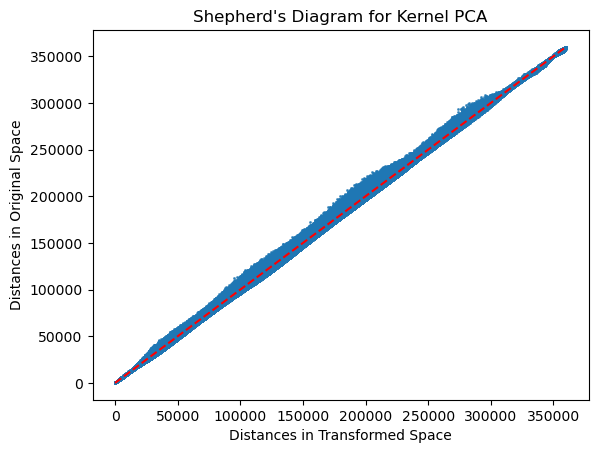

In [343]:
shephard_diagram(flat_original_pd, pd_sigma_three)

In [316]:
transformed_df_gau[3][:,[0,4]]

array([[-0.10566755, -0.00547886],
       [-0.09574213, -0.00445134],
       [-0.10193141, -0.00495235],
       ...,
       [-0.28188979, -0.03839974],
       [-0.28102749, -0.03985561],
       [-0.284894  , -0.0423942 ]])